In [1]:
%cd ..

/home/david/Desktop/NMEC-Using-DL


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
metadata = pd.read_csv('data/15minute_data_austin/metadata.csv')
data = pd.read_csv('data/15minute_data_austin/15minute_data_austin.csv')
data = data.fillna(0)
data['total'] = data.iloc[:, 2:].sum(axis = 1)

In [22]:
df = data[['dataid', 'local_15min', 'total']]
df['local_15min'] = df['local_15min'].str[:-3]
df['local_15min'] = pd.to_datetime(df['local_15min'])
df['date'] = df['local_15min'].dt.date
df['hour'] = df['local_15min'].dt.hour
df

/var/folders/cg/pm4dk58d6ndgwns95k12lkfw0000gn/T/ipykernel_88121/1032720479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['local_15min'] = df['local_15min'].str[:-3]
/var/folders/cg/pm4dk58d6ndgwns95k12lkfw0000gn/T/ipykernel_88121/1032720479.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['local_15min'] = pd.to_datetime(df['local_15min'])
/var/folders/cg/pm4dk58d6ndgwns95k12lkfw0000gn/T/ipykernel_88121/1032720479.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

,dataid,local_15min,total,date,hour
0,661,2018-11-21 15:15:00,248.593,2018-11-21,15
1,661,2018-11-21 15:30:00,248.671,2018-11-21,15
2,661,2018-11-21 15:45:00,248.725,2018-11-21,15
3,661,2018-11-21 16:00:00,248.971,2018-11-21,16
4,661,2018-11-21 16:15:00,249.042,2018-11-21,16
...,...,...,...,...,...
873281,9278,2018-12-31 22:45:00,248.590,2018-12-31,22
873282,9278,2018-12-31 23:00:00,247.676,2018-12-31,23
873283,9278,2018-12-31 23:15:00,247.448,2018-12-31,23
873284,9278,2018-12-31 23:30:00,247.378,2018-12-31,23


In [31]:
keep_cols = ['dataid', 'date', 'hour', 'total']
by_day = df[keep_cols].groupby(by=['dataid', 'date', 'hour'], as_index=False).sum()
by_day

,dataid,date,hour,total
0,661,2018-01-01,0,2.023
1,661,2018-01-01,1,7.389
2,661,2018-01-01,2,991.574
3,661,2018-01-01,3,990.731
4,661,2018-01-01,4,987.698
...,...,...,...,...
218317,9922,2018-12-31,19,987.802
218318,9922,2018-12-31,20,989.495
218319,9922,2018-12-31,21,1001.382
218320,9922,2018-12-31,22,986.242


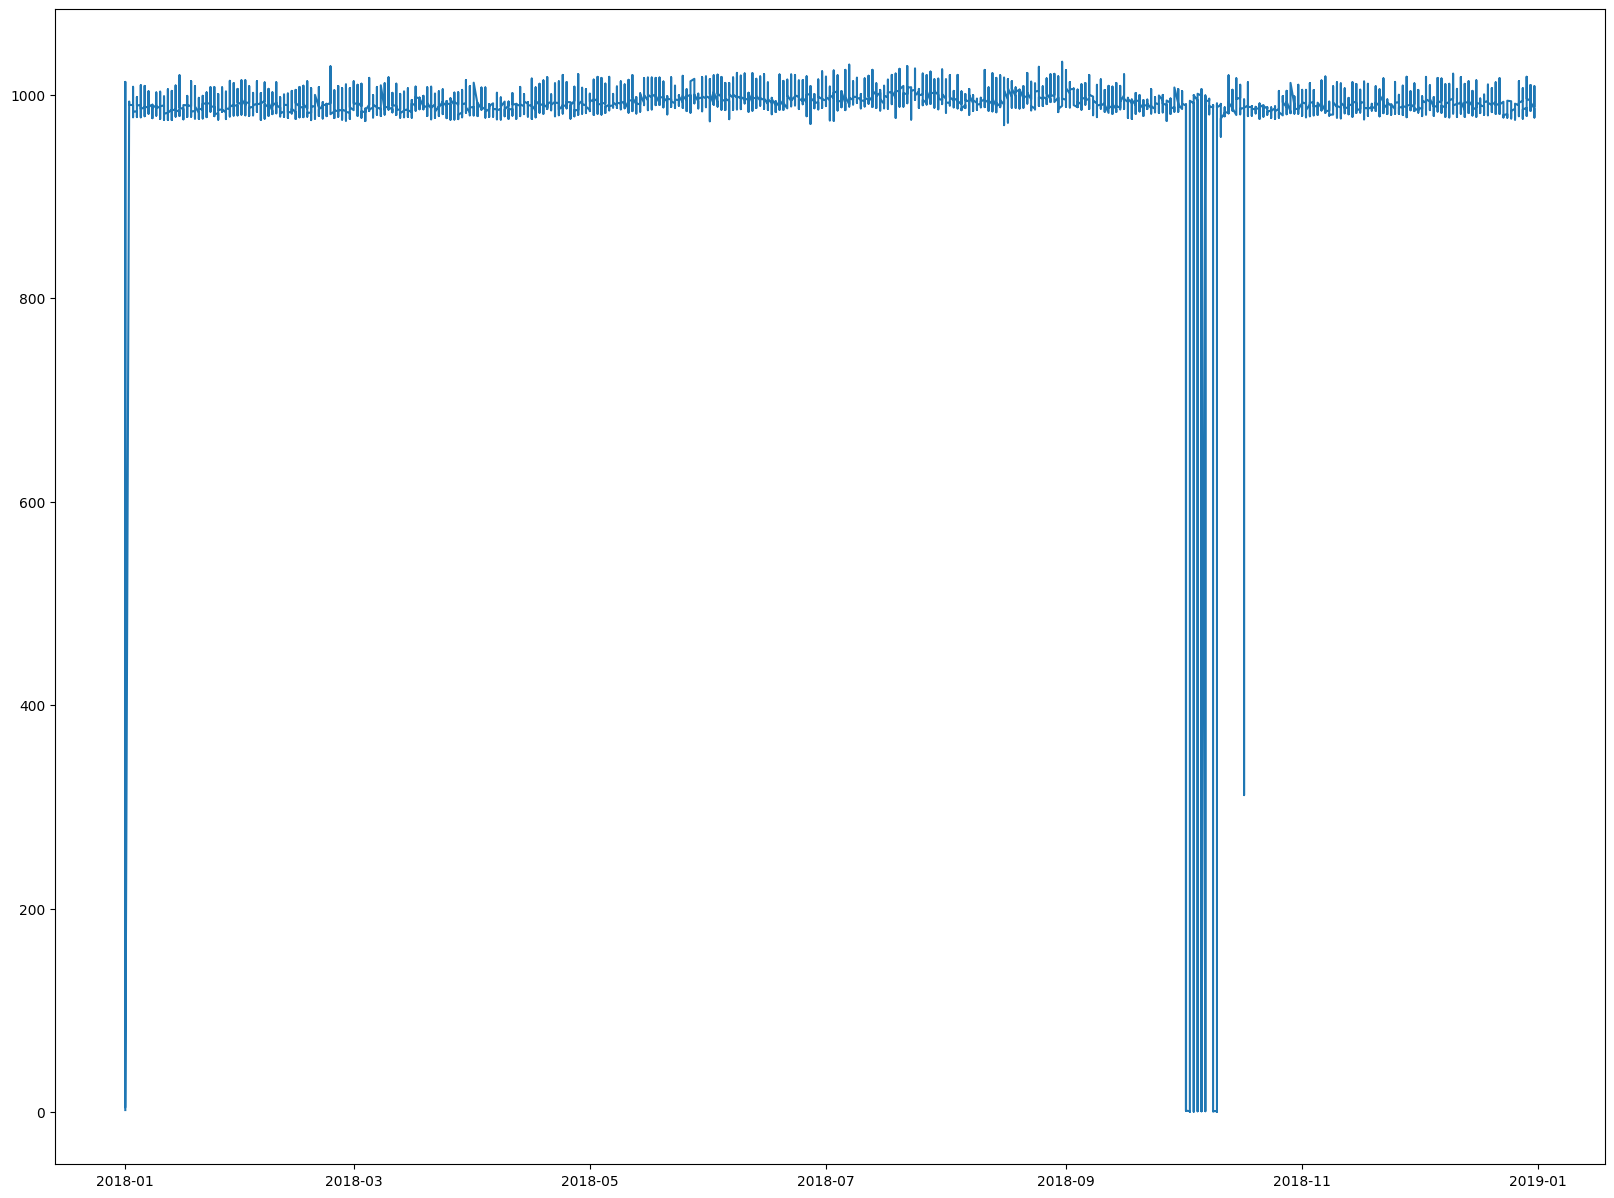

In [71]:
import matplotlib.pyplot as plt
cand_661 = by_day[by_day['dataid'] == 661]
cand_661 = cand_661.sort_values(by=['date', 'hour'])
plt.figure(figsize=(20,15))
plt.plot(cand_661['date'], cand_661['total'])

In [72]:
cand_661[cand_661['total'] < 900]

,dataid,date,hour,total
0,661,2018-01-01,0,2.023
1,661,2018-01-01,1,7.389
18,661,2018-01-01,18,10.617
19,661,2018-01-01,19,22.512
20,661,2018-01-01,20,8.316
...,...,...,...,...
6782,661,2018-10-10,16,0.529
6783,661,2018-10-10,17,0.384
6784,661,2018-10-10,18,0.845
6785,661,2018-10-10,19,0.599


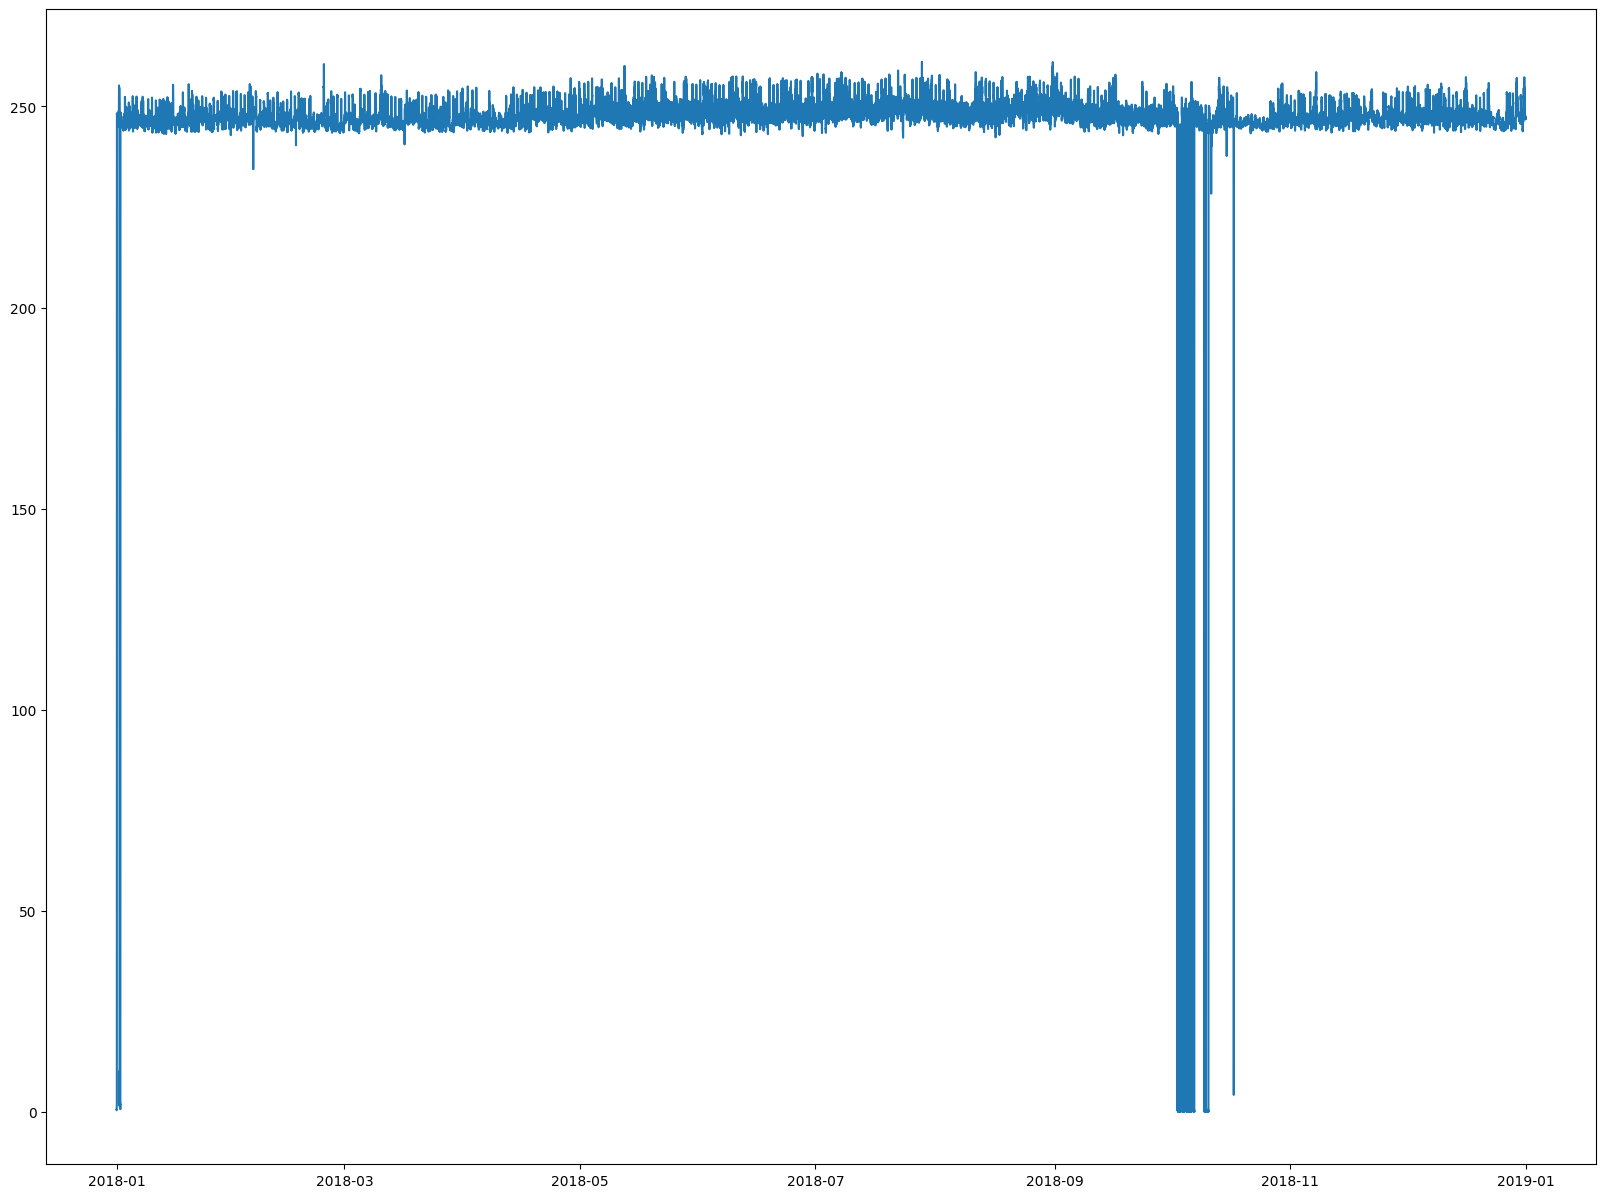

In [25]:
import matplotlib.pyplot as plt
cand_661 = df[df['dataid'] == 661]
cand_661 = cand_661.sort_values(by='local_15min')
plt.figure(figsize=(20,15))
# plt.xlim([pd.Timestamp('2018-01-01'), pd.Timestamp('2018-01-10')])
# plt.ylim([200, 300])
plt.plot(cand_661['local_15min'], cand_661['total'])

In [45]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(cand_661['total']))
your_dataframe = cand_661[(z_scores < 3)]
your_dataframe

,dataid,date,hour,total
2,661,2018-01-01,2,991.574
3,661,2018-01-01,3,990.731
4,661,2018-01-01,4,987.698
5,661,2018-01-01,5,985.795
6,661,2018-01-01,6,982.269
...,...,...,...,...
8753,661,2018-12-31,19,990.528
8754,661,2018-12-31,20,989.129
8755,661,2018-12-31,21,987.549
8756,661,2018-12-31,22,989.026


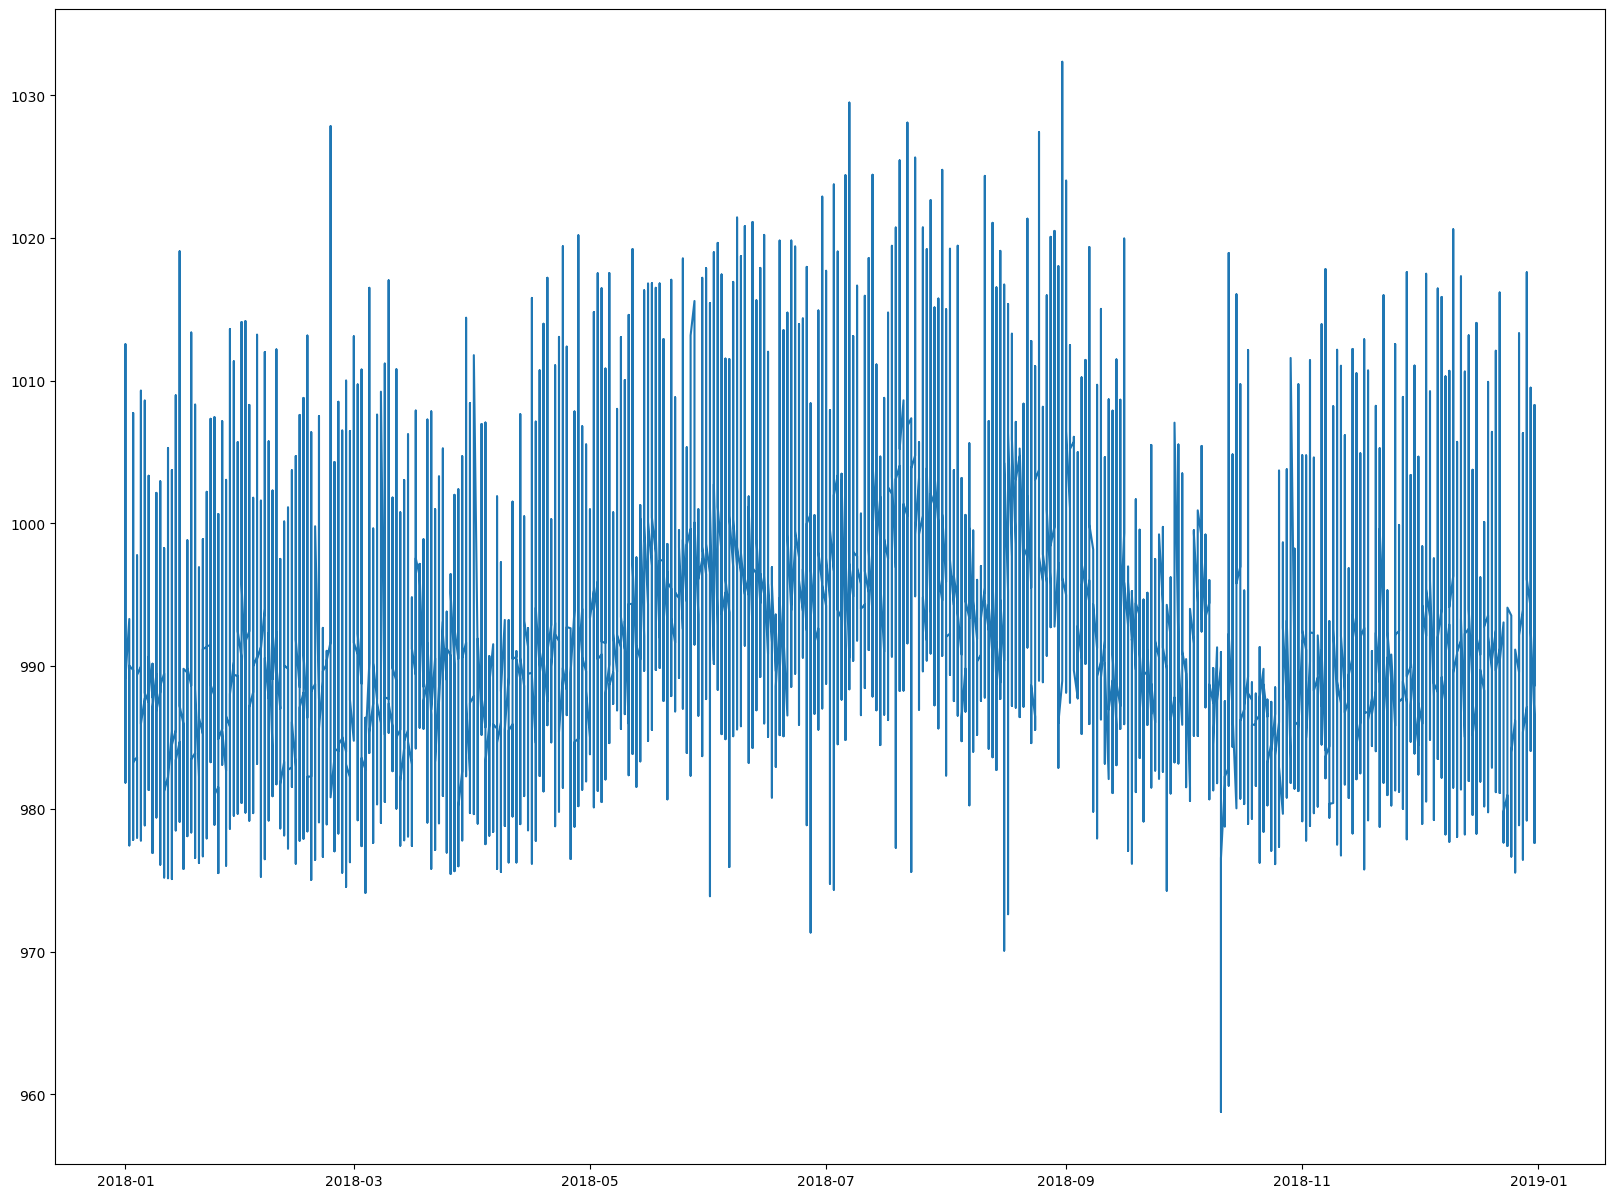

In [74]:
plt.figure(figsize=(20,15))
plt.plot(your_dataframe['date'], your_dataframe['total'])

In [63]:
# load weather data
weather = pd.read_csv('data/15minute_data_austin/3496632.csv')
keep_cols = ['DATE', 'TAVG', 'TMAX', 'TMIN']
aust_weather = weather[keep_cols].groupby(by=['DATE'], as_index=False).mean()
aust_weather['DATE'] = pd.to_datetime(aust_weather['DATE'])

In [67]:
hourly = by_day
hourly['date'] = pd.to_datetime(hourly['date'])

In [68]:
hourly_and_weather = pd.merge(hourly, aust_weather, left_on='date', right_on = 'DATE', how = 'inner')

In [75]:
order = ['dataid', 'DATE', 'hour', 'TMIN', 'TAVG', 'TMAX', 'total']
hourly_and_weather[order].to_csv('aust_hourly.csv', index = False)

## Remove Outliers

In [4]:
aust_hourly = pd.read_csv('data/15minute_data_austin/aust_hourly.csv')

In [110]:
# Function to calculate z-scores
def z_scores(s):
    return (s - s.mean()) / s.std()

# Applying the function to calculate z-scores within each 'dataid' group
aust_hourly['z_score'] = aust_hourly.groupby('dataid')['total'].transform(z_scores)

# Filtering out rows where the absolute z-score is 3 or higher
df_filtered = aust_hourly[(aust_hourly['z_score'].abs() < 2) & (aust_hourly['total'] > 850)]
df_filtered.iloc[:, :-1].to_csv('data/15minute_data_austin/aust_hourly_cleaned.csv', index = False)

In [8]:
# Assuming df is your dataframe
df_filtered = pd.read_csv('data/15minute_data_austin/aust_hourly_cleaned.csv')
df_filtered['datetime'] = pd.to_datetime(df_filtered['DATE']) + pd.to_timedelta(df_filtered['hour'], unit='h')

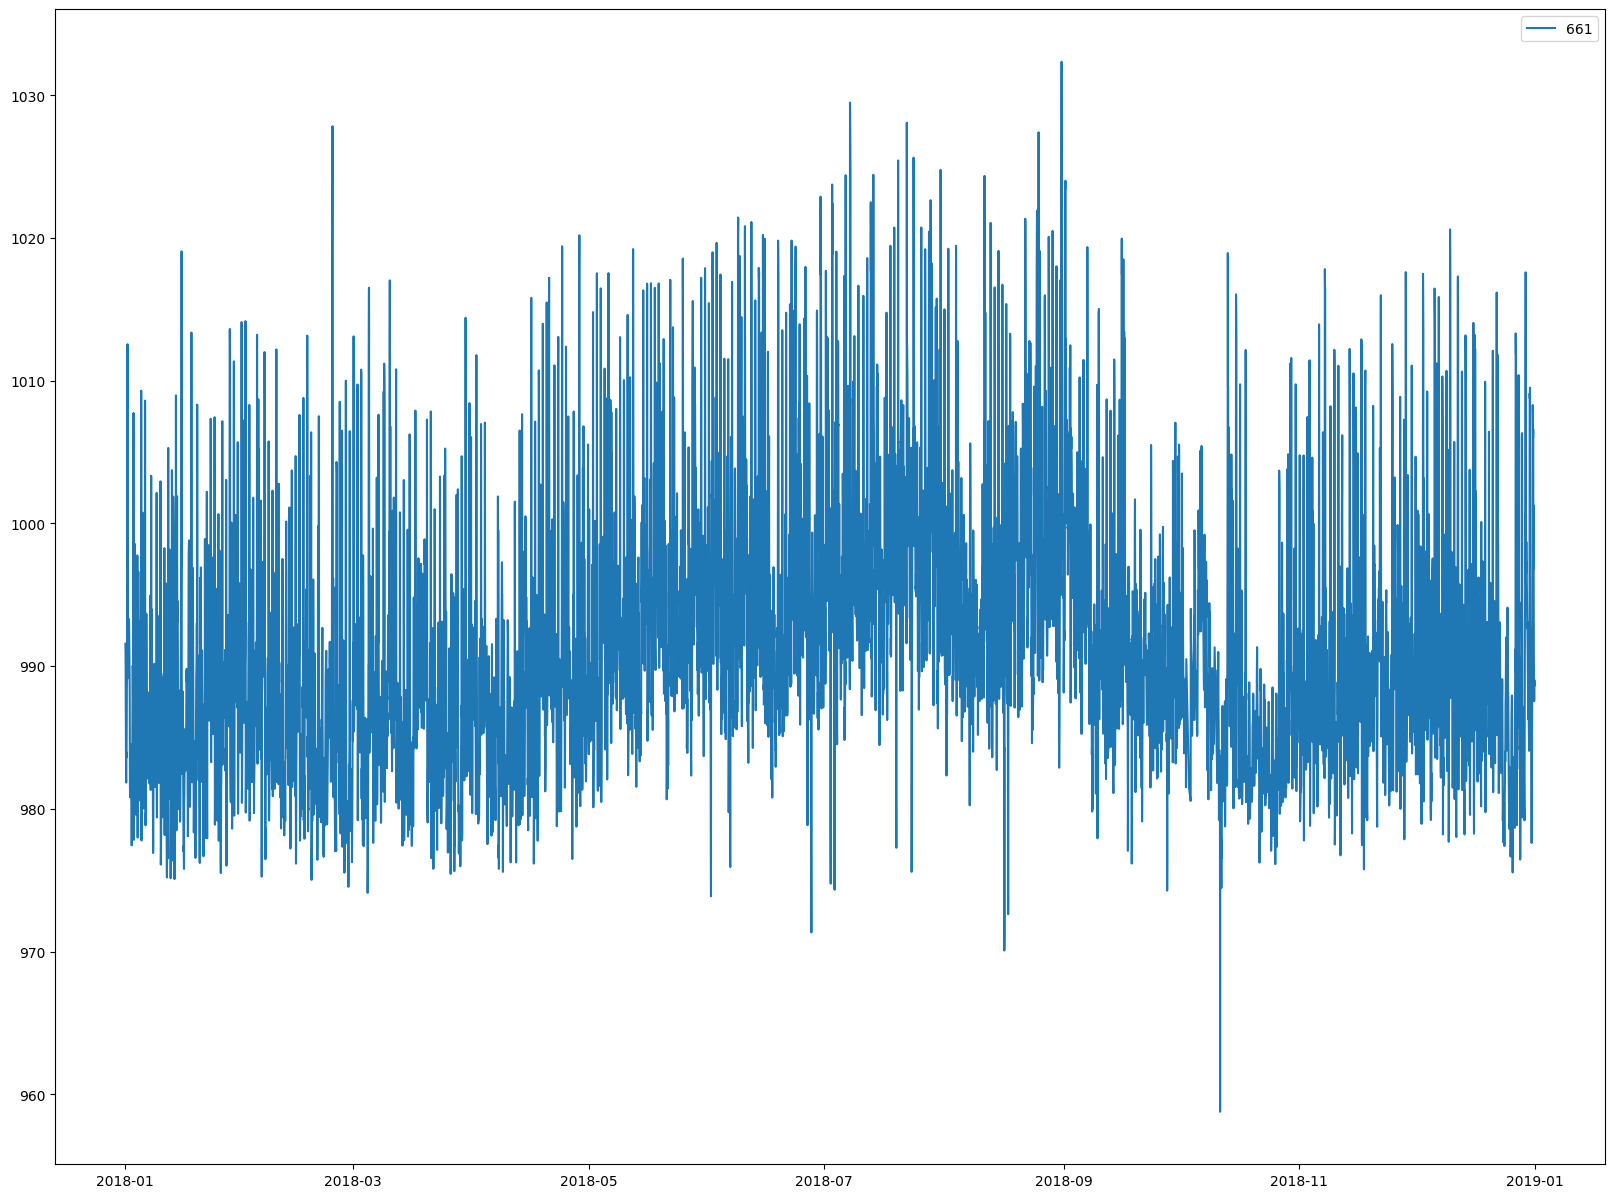

In [10]:
plt.figure(figsize=(20,15))
for id in df_filtered['dataid'].unique():
    if id != 661: continue
    reduced = df_filtered[df_filtered['dataid'] == id].sort_values('datetime')
    plt.plot(reduced['datetime'], reduced['total'], label = f'{id}')
plt.legend()
plt.show()

In [12]:
metadata = pd.read_csv('data/15minute_data_austin/metadata.csv')
metadata

,dataid,active_record,building_type,city,state,egauge_1min_min_time,egauge_1min_max_time,egauge_1min_data_availability,egauge_1s_min_time,egauge_1s_max_time,...,program_baseline,program_energy_internet_demo,program_lg_appliance,program_verizon,program_ccet_group,program_civita_group,program_shines,energy_storage_system,energy_storage_system_l1,energy_storage_system_l2
0,The unique identifier for the home. To be more...,this field will show yes if this participant i...,This field will read Single-Family Home if thi...,participant's city,participant's state,"If eGauge electricity data is present, this fi...","If eGauge electricity data is present, this fi...",This field shows how much one minute data is ...,If eGauge electricity data is present in one s...,If eGauge electricity data is present in one s...,...,This field will show 'yes' if this participant...,This field will show 'yes' if this participant...,This field will show 'yes' if this participant...,This field will show 'yes' if this participant...,This field will show one of the following grou...,This field will show one of the following grou...,This field will show 'yes' if this participant...,eGauge data present for a battery or other typ...,eGauge data present for leg 1 of a battery or ...,eGauge data present for leg 2 of a battery or ...
1,2836,NaN,Single-Family Home 001 (Master),Austin,Texas,NaN,NaN,NaN,NaN,NaN,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2743,NaN,Single-Family Home 001 (Master),Austin,Texas,NaN,NaN,NaN,NaN,NaN,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5323,NaN,Single-Family Home 001 (Master),Austin,Texas,NaN,NaN,NaN,NaN,NaN,...,yes,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8560,NaN,Single-Family Home 001 (Master),Austin,Texas,NaN,NaN,NaN,NaN,NaN,...,yes,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1922,7270,yes,Single-Family Home 001 (Master),Detroit,Michigan,2023-09-12 19:00:00-05:00,2023-09-24 02:59:00-05:00,94%,2023-09-12 19:00:00-05:00,2023-09-24 02:00:00-05:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1923,5766,yes,Single-Family Home 001 (Master),Detroit,Michigan,2023-09-12 19:00:00-05:00,2023-09-24 02:59:00-05:00,94%,2023-09-12 19:00:00-05:00,2023-09-16 12:00:00-05:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1924,11853,yes,Single-Family Home 001 (Master),Austin,Texas,2023-09-18 19:00:00-05:00,2023-09-24 00:59:00-05:00,88%,2023-09-18 19:00:00-05:00,2023-09-20 17:00:00-05:00,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1925,5822,yes,Single-Family Home 001 (Master),Whisper Valley,Texas,2021-01-31 18:00:00-06:00,2023-08-16 11:59:00-05:00,95%,2021-01-31 18:00:00-06:00,2023-08-14 22:00:00-05:00,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
program_cols = [col for col in metadata.columns if 'program' in col]
programs_meta = metadata.loc[1:, ['dataid'] + program_cols]
programs_meta['dataid'] = programs_meta['dataid'].astype(int)
programs_red = programs_meta[programs_meta['dataid'].isin(df_filtered['dataid'].unique())]

In [34]:
threshold = 2
columns_to_drop = [col for col in programs_red.columns if len(pd.unique(programs_red[col])) < threshold]
programs_red.drop(columns=columns_to_drop)

,dataid,program_baseline,program_lg_appliance,program_ccet_group,program_shines
1452,2361,NaN,NaN,NaN,NaN
1501,7719,NaN,NaN,NaN,NaN
1535,8565,NaN,NaN,NaN,NaN
1600,9278,NaN,NaN,NaN,NaN
1611,8386,NaN,NaN,NaN,NaN
1615,7800,NaN,NaN,CCET - Pricing Trial,NaN
1625,3538,NaN,NaN,NaN,NaN
1638,7901,NaN,NaN,CCET - Portal Only,NaN
1646,6139,yes,NaN,CCET - Pricing Trial,NaN
1648,5746,yes,NaN,CCET - Portal Only,NaN


In [67]:
import pandas as pd
import numpy as np
from pandas.tseries.holiday import USFederalHolidayCalendar

def add_isBday_column(df):
    # Ensure the 'datetime' column is in datetime format
    df['datetime'] = pd.to_datetime(df['datetime'])
    
    # Create a holiday calendar
    cal = USFederalHolidayCalendar()
    holidays = cal.holidays(start=df['datetime'].min(), end=df['datetime'].max())
    
    # Define business days
    business_days = pd.bdate_range(start=df['datetime'].min(), end=df['datetime'].max())
    
    # Check if each date is a business day and not a holiday
    df['isBday'] = np.where((df['datetime'].dt.date.isin(business_days.date)) & 
                            (~df['datetime'].dt.date.isin(holidays.date)), 1, 0)
    
    return df

In [68]:
# test program_baseline -> most variety, average them out maybe
cols = ['dataid', 'program_baseline']
prog_baseline = programs_red[cols].fillna('no')
merged = pd.merge(prog_baseline, df_filtered, on = 'dataid', how = 'inner')
merged['year'], merged['month'], merged['day'] = merged['datetime'].dt.year,merged['datetime'].dt.month, merged['datetime'].dt.day
merged = add_isBday_column(merged)
cols = list(merged.columns)
in_prog, opt_prog = merged[merged['program_baseline'] == 'yes'][cols],merged[merged['program_baseline'] == 'no'][cols]

In [71]:
# aggregate by hour -> mean
cols = [col for col in in_prog.columns if col not in ['DATE', 'dataid', 'program_baseline']]
print(cols)
in_prog_agg = in_prog[cols].groupby('datetime', as_index=False).mean()
in_prog_agg

['hour', 'TMIN', 'TAVG', 'TMAX', 'total', 'datetime', 'year', 'month', 'day', 'isBday']


,datetime,hour,TMIN,TAVG,TMAX,total,year,month,day,isBday
0,2018-01-01 01:00:00,1.0,-4.566667,-2.2,1.100,916.281000,2018.0,1.0,1.0,1.0
1,2018-01-01 02:00:00,2.0,-4.566667,-2.2,1.100,985.436231,2018.0,1.0,1.0,1.0
2,2018-01-01 03:00:00,3.0,-4.566667,-2.2,1.100,984.340500,2018.0,1.0,1.0,1.0
3,2018-01-01 04:00:00,4.0,-4.566667,-2.2,1.100,982.282083,2018.0,1.0,1.0,1.0
4,2018-01-01 05:00:00,5.0,-4.566667,-2.2,1.100,979.845462,2018.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
8747,2018-12-31 19:00:00,19.0,3.325000,8.2,14.325,985.844308,2018.0,12.0,31.0,1.0
8748,2018-12-31 20:00:00,20.0,3.325000,8.2,14.325,985.057231,2018.0,12.0,31.0,1.0
8749,2018-12-31 21:00:00,21.0,3.325000,8.2,14.325,985.265462,2018.0,12.0,31.0,1.0
8750,2018-12-31 22:00:00,22.0,3.325000,8.2,14.325,984.178538,2018.0,12.0,31.0,1.0


In [73]:
# aggregate by hour -> mean
cols = [col for col in opt_prog.columns if col not in ['DATE', 'dataid', 'program_baseline']]
print(cols)
opt_prog_agg = opt_prog[cols].groupby('datetime', as_index=False).mean()
opt_prog_agg

['hour', 'TMIN', 'TAVG', 'TMAX', 'total', 'datetime', 'year', 'month', 'day', 'isBday']


,datetime,hour,TMIN,TAVG,TMAX,total,year,month,day,isBday
0,2018-01-01 01:00:00,1.0,-4.566667,-2.2,1.100,988.799667,2018.0,1.0,1.0,1.0
1,2018-01-01 02:00:00,2.0,-4.566667,-2.2,1.100,995.235455,2018.0,1.0,1.0,1.0
2,2018-01-01 03:00:00,3.0,-4.566667,-2.2,1.100,994.605636,2018.0,1.0,1.0,1.0
3,2018-01-01 04:00:00,4.0,-4.566667,-2.2,1.100,991.943364,2018.0,1.0,1.0,1.0
4,2018-01-01 05:00:00,5.0,-4.566667,-2.2,1.100,990.067909,2018.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
8747,2018-12-31 19:00:00,19.0,3.325000,8.2,14.325,988.602455,2018.0,12.0,31.0,1.0
8748,2018-12-31 20:00:00,20.0,3.325000,8.2,14.325,989.393818,2018.0,12.0,31.0,1.0
8749,2018-12-31 21:00:00,21.0,3.325000,8.2,14.325,987.984000,2018.0,12.0,31.0,1.0
8750,2018-12-31 22:00:00,22.0,3.325000,8.2,14.325,987.649091,2018.0,12.0,31.0,1.0


In [74]:
order = ['datetime', 'year', 'month', 'day', 'hour', 'isBday', 'TMIN', 'TAVG', 'TMAX', 'total']
in_prog_agg.loc[:, order].to_csv('data/program_baseline/in_prog_mean.csv', index = False)
opt_prog_agg.loc[:, order].to_csv('data/program_baseline/opt_prog_mean.csv', index = False)

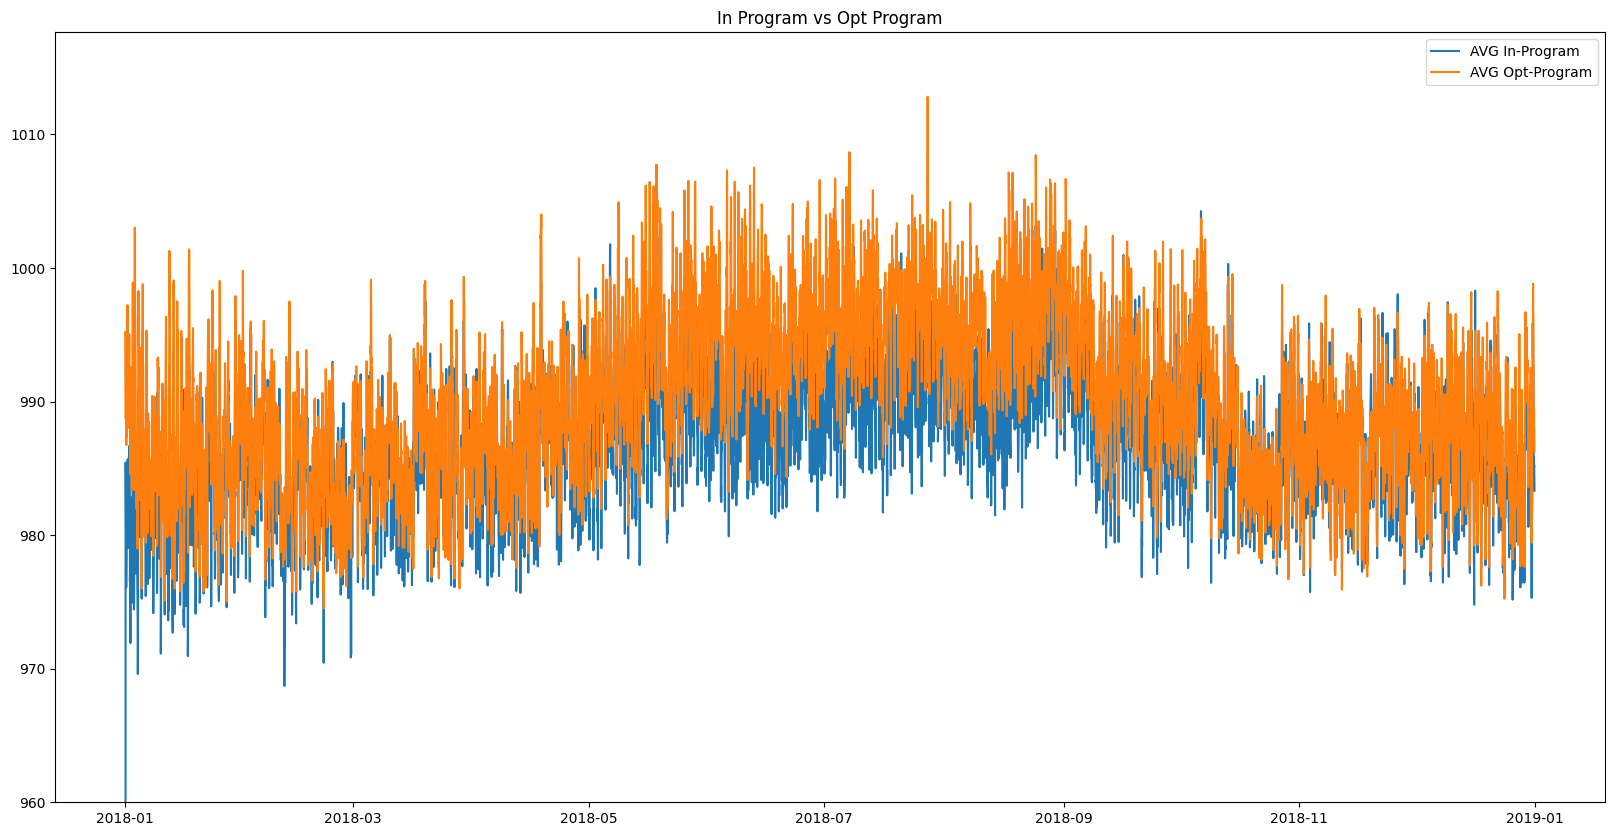

In [56]:
# In program vs Opt
# Is there a visual difference
plt.figure(figsize=(20,10))
plt.title('In Program vs Opt Program')
plt.plot(in_prog_agg['datetime'], in_prog_agg['total'], label = 'AVG In-Program')
plt.plot(opt_prog_agg['datetime'], opt_prog_agg['total'], label = 'AVG Opt-Program')
plt.legend()
plt.ylim(bottom = 960)
plt.show()

## Splitting into train-validation-test + Scaling Load

- Households in the program are by default test set
- 90-10 split for those not in the program
    - Validate on the 10% then compare on validation

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming you have already loaded opt_data
opt_data = pd.read_csv('program_baseline/opt_prog_mean.csv')
train, test = train_test_split(opt_data, test_size=0.1, shuffle=True)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the 'total' column of the training data
scaler.fit(train[['total']])

# Transform the 'total' column of the training data
train['total'] = scaler.transform(train[['total']])

# Transform the 'total' column of the test data
test['total'] = scaler.transform(test[['total']])

In [11]:
import pickle

# Save the scaler to a pickle file
with open('weights/scalers/load_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [14]:
train.to_csv('program_baseline/train-test/train.csv', index = False)
test.to_csv('program_baseline/train-test/test.csv', index = False)